In [34]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [35]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()


--2023-12-08 11:57:00--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-12-08 11:57:00 (4.76 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [36]:
# Factorize string features
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [37]:
# Spilt train-test data
test_dataset = dataset.sample(frac=0.2)
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")


In [38]:
# Build the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1),
])


In [39]:
# Compile the model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 32)                224       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
______________________

In [40]:
# Train the model
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping],
)

print(history)


Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 12890.2246 - mae: 12890.2246 - mse: 309620160.0000 - val_loss: 12758.6572 - val_mae: 12758.6572 - val_mse: 321463648.0000
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 9343.9658 - mae: 9343.9658 - mse: 210967856.0000 - val_loss: 7041.2441 - val_mae: 7041.2441 - val_mse: 133740192.0000
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 5323.0664 - mae: 5323.0664 - mse: 85516640.0000 - val_loss: 4108.3315 - val_mae: 4108.3315 - val_mse: 51860560.0000
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 4129.5962 - mae: 4129.5962 - mse: 48110536.0000 - val_loss: 3663.0144 - val_mae: 3663.0139 - val_mse: 34603488.0000
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 4195.0449 - mae: 4195.0449 - mse: 50418752.0000 - val_loss: 3564.5283 - val_mae: 3564.5283 - val_mse: 35893924.0000
Epoch 6/100
27/27 [===========================

9/9 - 0s - loss: 2517.8748 - mae: 2517.8748 - mse: 33526498.0000 - 38ms/epoch - 4ms/step
Testing set Mean Abs Error: 2517.87 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


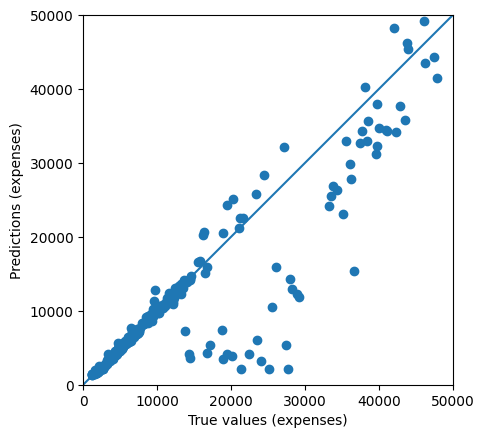

In [41]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
